In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/tmdb-box-office-prediction/sample_submission.csv
/kaggle/input/tmdb-box-office-prediction/test.csv
/kaggle/input/tmdb-box-office-prediction/train.csv


In [2]:
import matplotlib.pyplot as plt
import ast
from sklearn import model_selection
import sklearn

In [3]:
train=pd.read_csv('/kaggle/input/tmdb-box-office-prediction/train.csv')
test=pd.read_csv('/kaggle/input/tmdb-box-office-prediction/test.csv')

Feature Enginearing

* belongs_to_collection
* genres
* production_companies
* production_countries
* spoken_languages
* Keywords
* cast
* crew

In [4]:
def GetCSVFromListOfDict(keyNameToFetch,column,columnName):
    column=column.copy()
    column=column.fillna('[{}]')
    columnList=[]
    for index,row in column.iteritems():
        columnStr=''
        listofDict=ast.literal_eval(row)
        for dic in listofDict:

            if(keyNameToFetch in dic.keys()):
                columnStr=columnStr+';'+str(dic[keyNameToFetch]) 
        columnStr=columnStr.strip(';') # trim leading ;
        columnList.append(columnStr)

    tempDF=pd.DataFrame(columnList,columns=[columnName])
    return tempDF[columnName]

In [5]:
train['belongs_to_collection']=GetCSVFromListOfDict('name',train.belongs_to_collection,'belongs_to_collection')
train['genres']=GetCSVFromListOfDict('name',train.genres,'genres')
train['production_companies']=GetCSVFromListOfDict('name',train.production_companies,'production_companies')
train['production_countries']=GetCSVFromListOfDict('name',train.production_countries,'production_countries')
train['spoken_languages']=GetCSVFromListOfDict('iso_639_1',train.spoken_languages,'spoken_languages')
train['Keywords']=GetCSVFromListOfDict('name',train.Keywords,'Keywords')
train['Crew_Dept']=GetCSVFromListOfDict('department',train.crew,'crew')
train['Crew_Job']=GetCSVFromListOfDict('job',train.crew,'crew')
train['Crew_Name']=GetCSVFromListOfDict('name',train.crew,'crew')
train['Crew_Gender']=GetCSVFromListOfDict('gender',train.crew,'crew')


test['belongs_to_collection']=GetCSVFromListOfDict('name',test.belongs_to_collection,'belongs_to_collection')
test['genres']=GetCSVFromListOfDict('name',test.genres,'genres')
test['production_companies']=GetCSVFromListOfDict('name',test.production_companies,'production_companies')
test['production_countries']=GetCSVFromListOfDict('name',test.production_countries,'production_countries')
test['spoken_languages']=GetCSVFromListOfDict('iso_639_1',test.spoken_languages,'spoken_languages')
test['Keywords']=GetCSVFromListOfDict('name',test.Keywords,'Keywords')
test['Crew_Dept']=GetCSVFromListOfDict('department',test.crew,'crew')
test['Crew_Job']=GetCSVFromListOfDict('job',test.crew,'crew')
test['Crew_Name']=GetCSVFromListOfDict('name',test.crew,'crew')
test['Crew_Gender']=GetCSVFromListOfDict('gender',test.crew,'crew')

In [6]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,Crew_Dept,Crew_Job,Crew_Name,Crew_Gender
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,time travel;sequel;hot tub;duringcreditsstinger,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Directing;Directing;Writing;Writing;Production...,First Assistant Director;Director;Writer;Chara...,Kelly Cantley;Steve Pink;Josh Heald;Josh Heald...,0;2;2;2;2;0;2;0;2;2;0;0;0;2;0;0;0;2;0;0;0;0;0;...
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,coronation;duty;marriage;falling in love,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Directing;Camera;Sound;Production;Editing;Prod...,Director;Director of Photography;Original Musi...,Garry Marshall;Charles Minsky;John Debney;Whit...,2;2;2;1;0;2;1;1;1
2,3,,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,The road to greatness can take you to the edge.,Whiplash,jazz;obsession;conservatory;music teacher;new ...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Production;Sound;Production;Costume & Make-Up;...,Casting;Music Editor;Executive In Charge Of Pr...,Terri Taylor;Richard Henderson;Jeffrey Stott;H...,1;0;2;0;0;2;2;2;0;2;2;2;2;0;0;0;1;1;0;0;0;0;2;...
3,4,,1200000,Thriller;Drama,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,NaN,Kahaani,mystery;bollywood;police corruption;crime;indi...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Directing;Production;Writing,Director;Producer;Writer,Sujoy Ghosh;Sujoy Ghosh;Sujoy Ghosh,0;0;0
4,5,,0,Action;Thriller,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,NaN,Marine Boy,,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Directing;Writing,Director;Writer,Jong-seok Yoon;Jong-seok Yoon,0;0


In [7]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,Crew_Dept,Crew_Job,Crew_Name,Crew_Gender
0,3001,Pokémon Collection,0,Adventure;Animation;Family;Fantasy,http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,pok√©mon;pocket monsters,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",Directing;Writing,Director;Writer,Kunihiko Yuyama;Hideki Sonoda,0;2
1,3002,,88000,Horror;Science Fiction,NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,revenge;alien;b movie;cheating husband;violenc...,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",Editing;Camera;Production;Directing;Sound;Writ...,Editor;Director of Photography;Executive Produ...,Edward Mann;Jacques R. Marquette;Jacques R. Ma...,2;2;2;0;2;2;2;0
2,3003,,0,Comedy;Romance,NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,jealousy;love;revenge;break-up,"[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",Directing;Production;Production;Sound;Camera;E...,Director;Producer;Producer;Original Music Comp...,Griffin Dunne;Robert F. Newmyer;Jeffrey Silver...,0;0;2;1;2;1;0;0;0;2
3,3004,,6800000,Drama;War;Mystery,http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,Released,The search began at the opening of their mothe...,Incendies,prison;middle east;rape;muslim;militia;interpr...,"[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",Visual Effects;Production;Production;Productio...,Special Effects Supervisor;Casting;Co-Producer...,Louis Craig;Lucie Robitaille;Gilles Sacuto;Mil...,2;0;2;1;0;0;0;0;2;2;0;2;2;2;0;0;1;1;1;2;0;0;0;...
4,3005,,2000000,History;Documentary,NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,usa;1970s;sexual revolution;unsimulated sex,"[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",Production;Production;Production;Writing;Direc...,Producer;Executive Producer;Producer;Screenpla...,Brian Grazer;Kim Roth;Ron Howard;Fenton Bailey...,2;1;2;2;2;2;2;2;2;0;2;2;0;0


In [8]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [9]:
test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [10]:
print(len(train.belongs_to_collection))
train.belongs_to_collection.value_counts()

3000


                                          2396
James Bond Collection                       16
Friday the 13th Collection                   7
The Pink Panther (Original) Collection       6
Police Academy Collection                    5
                                          ... 
The Lion King Collection                     1
Spy Kids Collection                          1
Cat People Collection                        1
Analyze Collection                           1
Annie Collection                             1
Name: belongs_to_collection, Length: 423, dtype: int64

In [11]:
#checking the correlation of missing values and then determining if taking it into consideration will be of any importance
train['belongs_to_collection_missing']=(train.belongs_to_collection.str.strip()=='').astype(int)
test['belongs_to_collection_missing']=(test.belongs_to_collection.str.strip()=='').astype(int)

In [12]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,title,Keywords,cast,crew,revenue,Crew_Dept,Crew_Job,Crew_Name,Crew_Gender,belongs_to_collection_missing
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Hot Tub Time Machine 2,time travel;sequel;hot tub;duringcreditsstinger,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Directing;Directing;Writing;Writing;Production...,First Assistant Director;Director;Writer;Chara...,Kelly Cantley;Steve Pink;Josh Heald;Josh Heald...,0;2;2;2;2;0;2;0;2;2;0;0;0;2;0;0;0;2;0;0;0;0;0;...,0
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,The Princess Diaries 2: Royal Engagement,coronation;duty;marriage;falling in love,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Directing;Camera;Sound;Production;Editing;Prod...,Director;Director of Photography;Original Musi...,Garry Marshall;Charles Minsky;John Debney;Whit...,2;2;2;1;0;2;1;1;1,0
2,3,,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Whiplash,jazz;obsession;conservatory;music teacher;new ...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Production;Sound;Production;Costume & Make-Up;...,Casting;Music Editor;Executive In Charge Of Pr...,Terri Taylor;Richard Henderson;Jeffrey Stott;H...,1;0;2;0;0;2;2;2;0;2;2;2;2;0;0;0;1;1;0;0;0;0;2;...,1
3,4,,1200000,Thriller;Drama,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Kahaani,mystery;bollywood;police corruption;crime;indi...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Directing;Production;Writing,Director;Producer;Writer,Sujoy Ghosh;Sujoy Ghosh;Sujoy Ghosh,0;0;0,1
4,5,,0,Action;Thriller,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Marine Boy,,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Directing;Writing,Director;Writer,Jong-seok Yoon;Jong-seok Yoon,0;0,1


In [13]:
print(train[['belongs_to_collection_missing','revenue']].corr())



                               belongs_to_collection_missing   revenue
belongs_to_collection_missing                       1.000000 -0.339425
revenue                                            -0.339425  1.000000


since there is a small coeffieicent of correlation, it still contributes to the revenue . Hence "belongs to collection missing" should be kept as attribute

In [14]:
#dropping the belongs to collection column
train.drop(columns=['belongs_to_collection'],inplace=True)
test.drop(columns=['belongs_to_collection'],inplace=True)

In [15]:
#checking for the missing value in Genre
train.genres.isna().sum()

0

In [16]:
#converting bigrams to unigrams to avoid being into two columns
train['genres']=train.genres.str.replace(' ','_') 
train['genres']=train.genres.str.replace(';',' ')

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

feature_vect = CountVectorizer(max_features=10)
feature_vect.fit(train['genres'])

train_features=feature_vect.transform(train['genres'])
test_features=feature_vect.transform(test['genres'])   

train_features_df=pd.DataFrame(train_features.toarray(),columns=feature_vect.get_feature_names())
test_features_df=pd.DataFrame(test_features.toarray(),columns=feature_vect.get_feature_names())

train_features_df.columns='genres_'+train_features_df.columns
test_features_df.columns='genres_'+test_features_df.columns

train=pd.concat([train,train_features_df],axis=1)
test=pd.concat([test,test_features_df],axis=1)

train.drop(columns=['genres'],inplace=True)
test.drop(columns=['genres'],inplace=True)



In [18]:
#checking missing values in production companies
print(train.production_companies.value_counts().head(20))
print(train.production_companies.isna().sum())

                                                    156
Paramount Pictures                                   51
Universal Pictures                                   36
Warner Bros.                                         32
Metro-Goldwyn-Mayer (MGM)                            32
Twentieth Century Fox Film Corporation               24
Touchstone Pictures                                  17
New Line Cinema                                      17
Columbia Pictures                                    17
TriStar Pictures                                     16
Orion Pictures                                       12
Walt Disney Pictures                                 12
United Artists                                       11
Columbia Pictures Corporation                        10
Miramax Films                                         9
Hollywood Pictures                                    7
Warner Bros.;Morgan Creek Productions                 7
Blue Sky Studios;Twentieth Century Fox Animation

In [19]:
print(train.production_countries.value_counts().head(20))
print(train.production_countries.isna().sum())


United States of America                   1752
United Kingdom;United States of America     118
United Kingdom                               94
India                                        69
                                             55
France                                       51
Canada;United States of America              48
Germany;United States of America             47
Russia                                       46
Japan                                        31
France;United States of America              28
Canada                                       21
Australia;United States of America           21
Spain                                        19
South Korea                                  18
France;United Kingdom                        16
Japan;United States of America               16
Australia                                    16
Italy                                        14
Hong Kong                                    14
Name: production_countries, dtype: int64

In [20]:
#cleaning production countries data and avoid creating biagrams 
train['production_countries']=train.production_countries.str.replace(' ','_')
train['production_countries']=train.production_countries.str.replace(';',' ')
test['production_countries']=test.production_countries.str.replace(' ','_')
test['production_countries']=test.production_countries.str.replace(';',' ')

In [21]:
train['IsProductionFromUSA']=(train['production_countries']=='united_states_of_america').astype(int)
test['IsProductionFromUSA']=(test['production_countries']=='united_states_of_america').astype(int)
train.drop(columns=['production_countries'],inplace=True)
test.drop(columns=['production_countries'],inplace=True)

In [22]:
#cheacking correlation for the between the spoken languages and the revenue
train['IsEnglishLanguage']=((train['spoken_languages'].str.contains('en'))& (train['original_language']=='en')).astype(int)
test['IsEnglishLanguage']=((test['spoken_languages'].str.contains('en'))&(test['original_language']=='en')).astype(int)


In [23]:
train[['IsEnglishLanguage','revenue']].corr()

,IsEnglishLanguage,revenue
IsEnglishLanguage,1.000000,0.151381
revenue,0.151381,1.000000


In [24]:
#Deleting the columns after checking the correlation
train.drop(columns=['spoken_languages','original_language'],inplace=True)
test.drop(columns=['spoken_languages','original_language'],inplace=True)

In [25]:
#same reason as above, avoiding turing them into biagrams
train['Keywords']=train.Keywords.str.replace(' ','_')
train['Keywords']=train.Keywords.str.replace(';',' ')
train['Keywords']=train['Keywords'].str.lower()
test['Keywords']=test.Keywords.str.replace(' ','_') 
test['Keywords']=test.Keywords.str.replace(';',' ')
test['Keywords']=test['Keywords'].str.lower()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

feature_vect = CountVectorizer(max_features=10)
feature_vect.fit(train['Keywords'])

train_features=feature_vect.transform(train['Keywords'])
test_features=feature_vect.transform(test['Keywords'])

train_features_df=pd.DataFrame(train_features.toarray(),columns=feature_vect.get_feature_names())
test_features_df=pd.DataFrame(test_features.toarray(),columns=feature_vect.get_feature_names())

train_features_df.columns='Keywords_'+train_features_df.columns
test_features_df.columns='Keywords_'+test_features_df.columns

train=pd.concat([train,train_features_df],axis=1)
test=pd.concat([test,test_features_df],axis=1)

train.drop(columns=['Keywords'],inplace=True)
test.drop(columns=['Keywords'],inplace=True)

In [27]:
#checking the missing values in the homepage attribute

train.homepage.isna().sum()

2054

In [28]:
train['homepageavaialble']=(train.homepage.isna()==False).astype(int)
test['homepageavaialble']=(test.homepage.isna()==False).astype(int)

In [29]:
train[['homepageavaialble','revenue']].corr()

,homepageavaialble,revenue
homepageavaialble,1.000000,0.263179
revenue,0.263179,1.000000


In [30]:
#working and extracting the date attribute
date_split=train.release_date.str.extract('([0-9]+)/([0-9]+)/([0-9]+)')
date_split.columns=['Month','Date','Year']

date_split.loc[date_split.Year.astype(int)>20,'Year']='19'+date_split.loc[date_split.Year.astype(int)>20,'Year']
date_split.loc[date_split.Year.astype(int)<=20,'Year']='20'+date_split.loc[date_split.Year.astype(int)<=20,'Year']

train.drop(columns=['release_date'],inplace=True)
train=pd.concat([train,date_split.astype(int)],axis=1)


print(test.release_date.mode())
test['release_date'].fillna('9/9/11',inplace=True)

test['release_date'].isna().sum()
date_split=test.release_date.str.extract('([0-9]+)/([0-9]+)/([0-9]+)')
date_split.columns=['Month','Date','Year']


date_split.loc[date_split.Year.astype(int)>20,'Year']='19'+date_split.loc[date_split.Year.astype(int)>20,'Year']
date_split.loc[date_split.Year.astype(int)<=20,'Year']='20'+date_split.loc[date_split.Year.astype(int)<=20,'Year']


test.drop(columns=['release_date'],inplace=True)
test=pd.concat([test,date_split.astype(int)],axis=1)

pd.concat([pd.get_dummies(train['Month'].astype(str)),train.revenue],axis=1).corr()['revenue']

0    9/9/11
dtype: object


1         -0.072231
10        -0.060607
11         0.021121
12         0.067034
2         -0.018551
3          0.011774
4         -0.018242
5          0.049087
6          0.130263
7          0.054357
8         -0.056009
9         -0.083246
revenue    1.000000
Name: revenue, dtype: float64

In [31]:
train.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies', 'runtime',
       'status', 'tagline', 'title', 'cast', 'crew', 'revenue', 'Crew_Dept',
       'Crew_Job', 'Crew_Name', 'Crew_Gender', 'belongs_to_collection_missing',
       'genres_action', 'genres_adventure', 'genres_comedy', 'genres_crime',
       'genres_drama', 'genres_family', 'genres_horror', 'genres_romance',
       'genres_science_fiction', 'genres_thriller', 'IsProductionFromUSA',
       'IsEnglishLanguage', 'Keywords_aftercreditsstinger',
       'Keywords_based_on_novel', 'Keywords_biography',
       'Keywords_duringcreditsstinger', 'Keywords_independent_film',
       'Keywords_murder', 'Keywords_revenge', 'Keywords_sport',
       'Keywords_violence', 'Keywords_woman_director', 'homepageavaialble',
       'Month', 'Date', 'Year'],
      dtype='object')

In [32]:
train.groupby(by='Month')['revenue'].mean()

Month
1     3.070678e+07
2     5.778889e+07
3     7.224145e+07
4     5.831416e+07
5     9.048772e+07
6     1.278864e+08
7     9.404021e+07
8     4.151070e+07
9     3.582428e+07
10    4.204264e+07
11    7.702461e+07
12    9.646238e+07
Name: revenue, dtype: float64

In [33]:
pd.concat([((train.Month==6) |
            (train.Month==12)|
           (train.Month==7)
           ).astype(int),train.revenue],axis=1).corr()['revenue']

Month      0.159908
revenue    1.000000
Name: revenue, dtype: float64

In [34]:
train['realesemonthseason']=((train.Month==6) |(train.Month==12)|(train.Month==7)).astype(int)
test['realesemonthseason']=((test.Month==6) |(test.Month==12)|(test.Month==7)).astype(int)
train.drop(columns=['Month'],inplace=True)
test.drop(columns=['Month'],inplace=True)

In [35]:
train.drop(columns=['Date'],inplace=True)
test.drop(columns=['Date'],inplace=True)

In [36]:
#log scaling

In [37]:
train['revenue']=np.log1p(train.revenue)
train['budget']=np.log1p(train.budget)
test['budget']=np.log1p(test.budget)


train['popularity']=np.log1p(train.popularity)
test['popularity']=np.log1p(test.popularity)

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [39]:
dtype = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_nm=train.select_dtypes(include=dtype)
test_nm=test.select_dtypes(include=dtype)

In [40]:
train_nm.drop(columns=['id'],inplace=True)
test_nm.drop(columns=['id'],inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
train_nm=train_nm.fillna(train_nm.median())
test_nm=test_nm.fillna(train_nm.median())

In [46]:
train_nm.to_csv("clean_movie.csv")

In [42]:
X = train_nm.drop(columns=['revenue'])
Y = train_nm['revenue']

In [43]:
print(X.shape)
print(Y.shape)

(3000, 29)
(3000,)


In [44]:
validation_size = 0.2
seed = 100
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [47]:
import xgboost
model_XG = xgboost.XGBRegressor() 
model_XG.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [48]:
trainResult_XG = model_XG.predict(X_train)
testResult_XG = model_XG.predict(X_test)

print("Mean squared error: %.5f"%np.sqrt( mean_squared_error(Y_train, trainResult_XG)))
print('Variance score: %.4f' % r2_score(Y_train, trainResult_XG))
print("Mean squared error: %.5f"% np.sqrt(mean_squared_error(Y_test, testResult_XG)))
print('Variance score: %.4f' % r2_score(Y_test, testResult_XG))

Mean squared error: 1.78925
Variance score: 0.6571
Mean squared error: 2.14181
Variance score: 0.5165


In [49]:
import seaborn as sns

In [52]:
data=pd.read_csv('/kaggle/input/tmdb-box-office-prediction/train.csv')

In [67]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [73]:
data['genres']=GetCSVFromListOfDict('name',data.genres,'genres')

In [78]:
data['genres']=data.genres.str.replace(";"," ")
    

In [94]:

import nltk

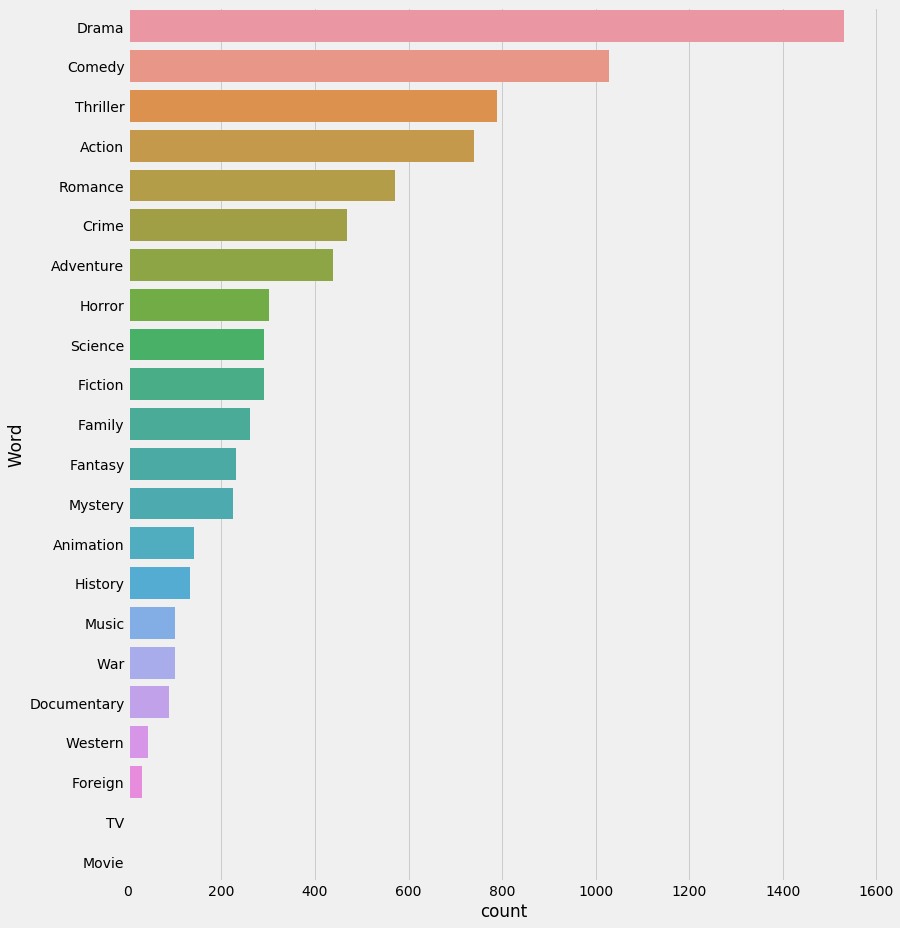

In [95]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(data['genres'], 100)

Text(0.5, 1.0, 'Distribution of revenues(nomal scale)')

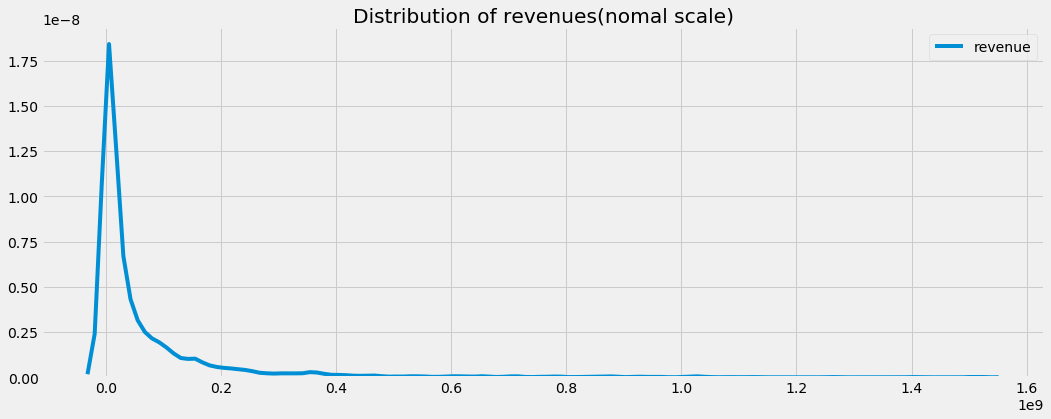

In [96]:
# Set the style of plots
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1,1, figsize = (16, 6))
sns.kdeplot(data['revenue'])
plt.title('Distribution of revenues(nomal scale)')

Text(0.5, 1.0, 'Distribution of revenues in log scale')

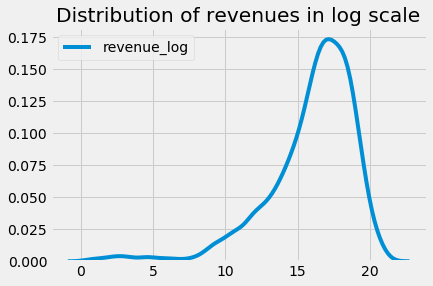

In [97]:
data['revenue_log'] = np.log1p(data['revenue']) #changing it to log1
sns.kdeplot(data['revenue_log'])
plt.title('Distribution of revenues in log scale')

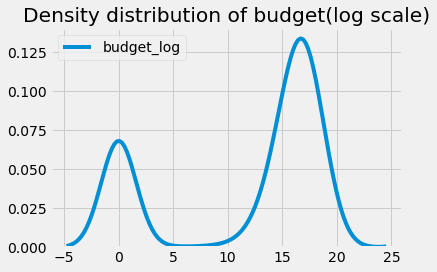

In [99]:
data['budget_log'] = np.log1p(data['budget'])

sns.kdeplot(data['budget_log'])
plt.title('Density distribution of budget(log scale)')
plt.tight_layout()

Text(0.5, 1.0, 'correlation of popularity X revenue')

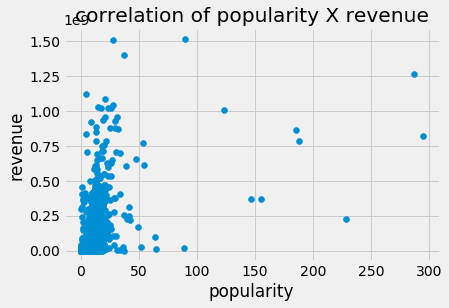

In [100]:
plt.scatter(x = data['popularity'], y=data['revenue'])
plt.ylabel('revenue')
plt.xlabel('popularity')
plt.title('correlation of popularity X revenue')

,budget,popularity,runtime,revenue,belongs_to_collection_missing,genres_action,genres_adventure,genres_comedy,genres_crime,genres_drama,...,Keywords_duringcreditsstinger,Keywords_independent_film,Keywords_murder,Keywords_revenge,Keywords_sport,Keywords_violence,Keywords_woman_director,homepageavaialble,Year,realesemonthseason
0,16.454568,2.024905,93.0,16.326300,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,2015,0
1,17.504390,2.224504,113.0,18.370959,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,2004,0
2,15.009433,4.178992,105.0,16.387512,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,2014,0
3,13.997833,1.429099,122.0,16.588099,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,2012,0
4,0.000000,0.764570,118.0,15.182615,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2009,0
5,15.894952,0.555765,83.0,14.997740,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1987,0
6,16.454568,2.114625,92.0,18.263396,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2012,0
7,0.000000,1.081481,84.0,14.765821,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2004,0
8,0.000000,2.067169,100.0,17.351454,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1996,0
9,15.607270,1.735548,91.0,16.746717,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2003,0


Text(0.5, 1.0, 'Distribution of Year(nomal scale) for movie realise')

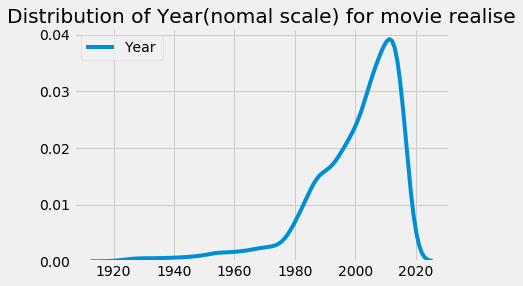

In [106]:
sns.kdeplot(train_nm['Year'])
plt.title('Distribution of Year(nomal scale) for movie realise')

Text(0.5, 1.0, 'Distribution of genres')

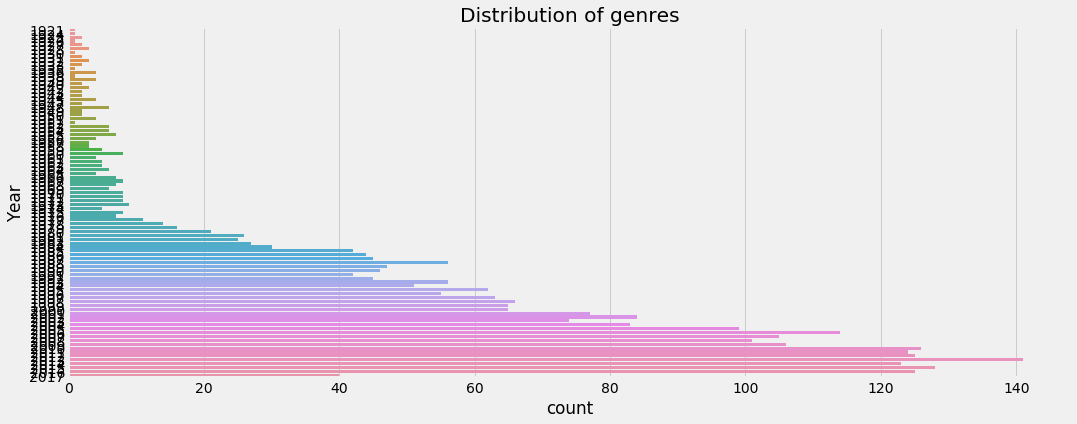

In [108]:
fig, ax = plt.subplots(1,1, figsize = (16, 6))
sns.countplot(y=train_nm['Year'])
plt.title('Distribution of year')

In [111]:
data[['release_month','release_day','release_year']]=data['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int) #getting the month year and day using the string split function and the / as a delimiter; eg: 5/25/2015 -> month 5/ day 25 / year 2015
data.loc[ (data['release_year'] <= 19) & (data['release_year'] < 100), "release_year"] += 2000 ## some rows have 4 digits for the year instead of 2, so the release year < 100 and > 100 is checking that
data.loc[ (data['release_year'] > 19)  & (data['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(data['release_date']) #using the pandas to_datetime function to format the data, get a Series,  and store it in a variable that is gonna be used later to get the day of week and quarter
data['release_dayofweek'] = releaseDate.dt.dayofweek
data['release_quarter'] = releaseDate.dt.quarter

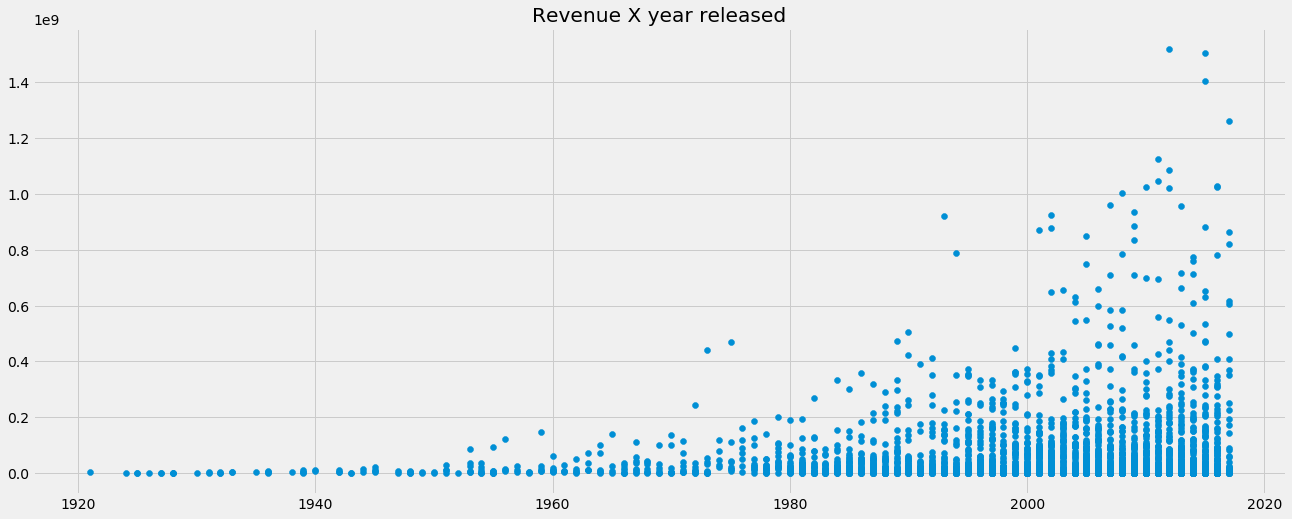

In [112]:
plt.figure(figsize=(20, 8))
plt.scatter(x='release_year', y='revenue', data=data); plt.title('Revenue X year released');

Text(0.5, 1.0, 'Days of the week, from 0 - sunday,  to 6 - saturday')

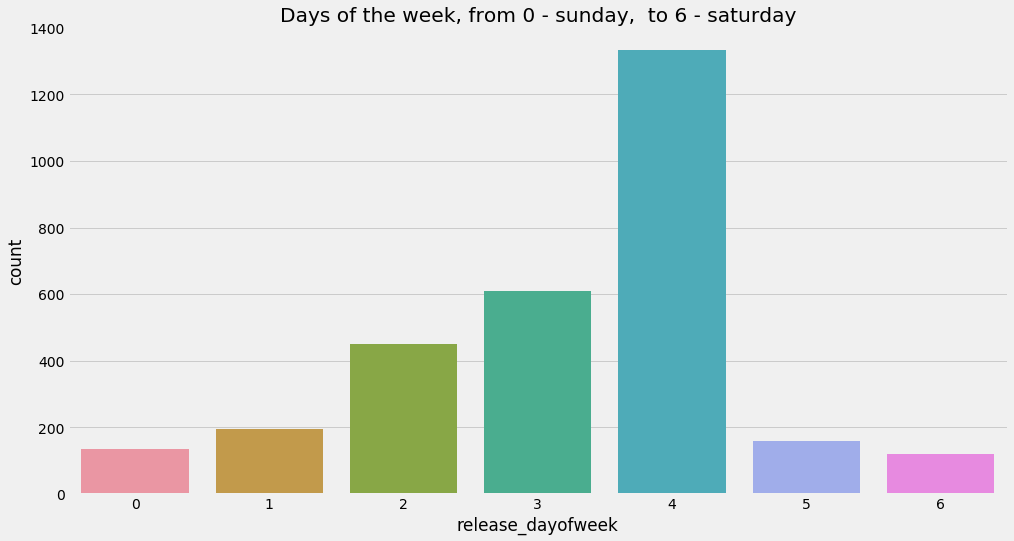

In [113]:
plt.figure(figsize=(15, 8))
sns.countplot(data['release_dayofweek']); plt.title('Days of the week, from 0 - sunday,  to 6 - saturday')

Text(0.5, 1.0, 'Distribution of movies by month')

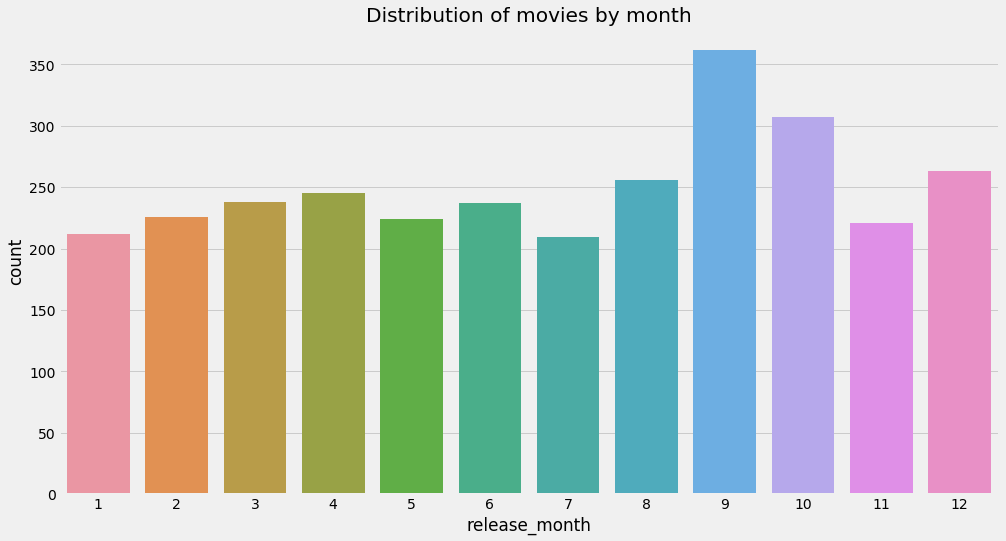

In [114]:
plt.figure(figsize=(15, 8))
sns.countplot(data['release_month']); plt.title('Distribution of movies by month')

Text(0.5, 1.0, 'Distribution of movies by days in a month')

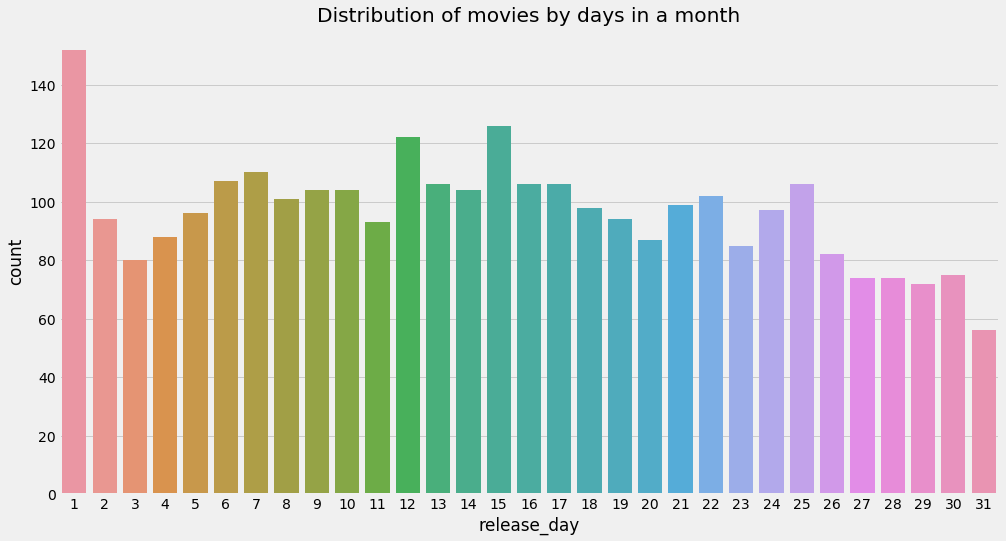

In [115]:
plt.figure(figsize=(15, 8))
sns.countplot(data['release_day']); plt.title('Distribution of movies by days in a month')

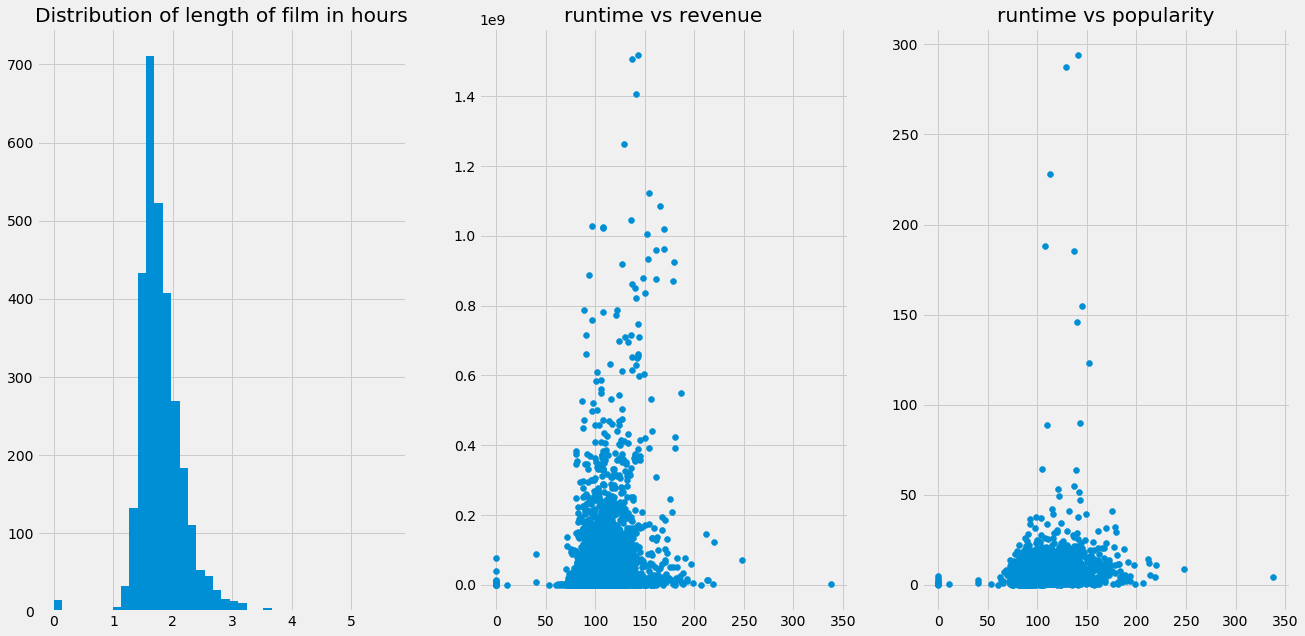

In [116]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.hist(data['runtime'].fillna(0) / 60, bins=40) #filling the null values with 0
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(data['runtime'].fillna(0), data['revenue'])
plt.title('runtime vs revenue');
plt.subplot(1, 3, 3)
plt.scatter(data['runtime'].fillna(0), data['popularity'])
plt.title('runtime vs popularity');